# AIM : TO DEMONSTRATE REGULARISATION OVER THE NON LINEAR MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("china_sales.csv")
df

,Year,value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [3]:
x1 = df['Year'].values
x2 = df['value'].values

x1 = x1.reshape(-1,1)

In [4]:
print(x1)

[[1960]
 [1961]
 [1962]
 [1963]
 [1964]
 [1965]
 [1966]
 [1967]
 [1968]
 [1969]
 [1970]
 [1971]
 [1972]
 [1973]
 [1974]
 [1975]
 [1976]
 [1977]
 [1978]
 [1979]
 [1980]
 [1981]
 [1982]
 [1983]
 [1984]
 [1985]
 [1986]
 [1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]
 [2012]
 [2013]
 [2014]]


In [5]:
print(x2)

[5.91841165e+10 4.95570502e+10 4.66851785e+10 5.00973033e+10
 5.90622549e+10 6.97091531e+10 7.58794348e+10 7.20570286e+10
 6.99934979e+10 7.87188205e+10 9.15062113e+10 9.85620238e+10
 1.12160000e+11 1.36770000e+11 1.42255000e+11 1.61162000e+11
 1.51628000e+11 1.72349000e+11 1.48382000e+11 1.76857000e+11
 1.89650000e+11 1.94369000e+11 2.03550000e+11 2.28950000e+11
 2.58082000e+11 3.07480000e+11 2.98806000e+11 2.71350000e+11
 3.10722000e+11 3.45957000e+11 3.58973000e+11 3.81455000e+11
 4.24934000e+11 4.42875000e+11 5.62261000e+11 7.32032000e+11
 8.60844000e+11 9.58159000e+11 1.02528000e+12 1.08945000e+12
 1.20526000e+12 1.33223000e+12 1.46191000e+12 1.64993000e+12
 1.94175000e+12 2.26860000e+12 2.72978000e+12 3.52309000e+12
 4.55843000e+12 5.05942000e+12 6.03966000e+12 7.49243000e+12
 8.46162000e+12 9.49060000e+12 1.03548000e+13]


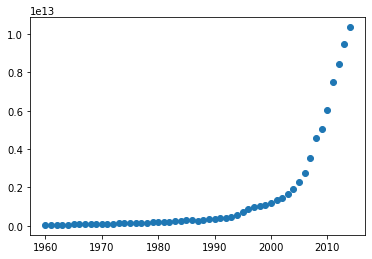

In [6]:
plt.scatter(x1,x2)
plt.show()

C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.37095e-31): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Harish\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.37057e-30): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


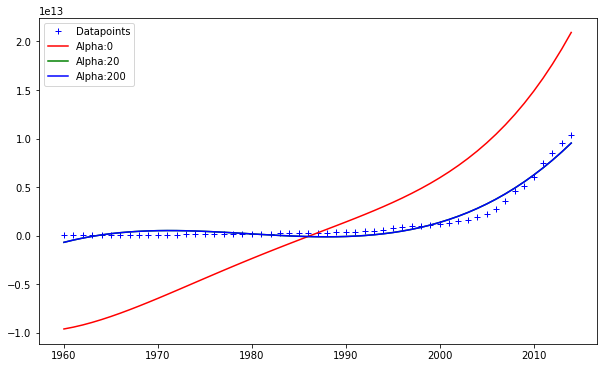

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

alpha = 100000

def Get_Preds_Ridge(x1,x2,alpha):
    model = Pipeline([('poly_features',PolynomialFeatures(degree = 5)),('ridge',Ridge(alpha = alpha))])
    model.fit(x1,x2)
    return model.predict(x1)

alphas = [0,20,200]
cs = ['r','g','b']

plt.figure(figsize = (10,6))
plt.plot(x1,x2,'b+',label = 'Datapoints')

for alpha,c in zip(alphas,cs):
    preds = Get_Preds_Ridge(x1,x2,alpha)
    plt.plot(sorted(x1[:,0]),preds[np.argsort(x1[:,0])],c,label = 'Alpha:{}'.format(alpha))

plt.legend()
plt.show()